In [17]:
###Task1: Import packages


In [82]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [16]:
path = r'E:\NGOCCAN\PYTHON\Python_DataAnalyst\Data_Analyst\Sales_Data'
dataframe = pd.read_csv('E:\\NGOCCAN\\PYTHON\\Python_DataAnalyst\\Data_Analyst\\Sales_Data/sales2019_4.csv')
dataframe.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


###Task 2:  Clean and Preprocess Data

###Task2: Merge 12-month data

In [25]:

frames =[]
all_lentgth = []
for file in os.listdir(path):
    filepath = path + '/'+file
    df1 = pd.read_csv(filepath)
    frames.append(df1)
    result = pd.concat(frames)
    lenght_1month = len(df1.index)
    all_lentgth.append( lenght_1month)
df = result
df.to_csv('TonghopfileSales2019.csv', index = False)

###Task2.2: Add 'Month' column

In [38]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [44]:
print(set(df['Month']))

{'03', '06', '12', '10', '04', '05', '08', '02', '11', '09', '07', '01'}


###Task2.3: Get rid of 'Or' and 'nan' value

In [40]:
df = df.dropna(how= 'all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [43]:
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


###3: Reporting


##Task3.1: What was the best month for sales? How to much?


In [63]:
df['Sales'] = ''
df.drop(df.columns[[8]],axis = 1, inplace= True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [65]:
print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype )


int8
float32


In [64]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast='float')

In [70]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,"387 10th St, Austin, TX 73301",01,11.990000


In [72]:


first_columns = df.pop('Sales')
df.insert(4,'Sales',first_columns)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,"387 10th St, Austin, TX 73301",01


In [74]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [75]:
Sales_value = df.groupby('Month').sum()['Sales']
Sales_value.max()

4613443.5

In [79]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Sales in USD')

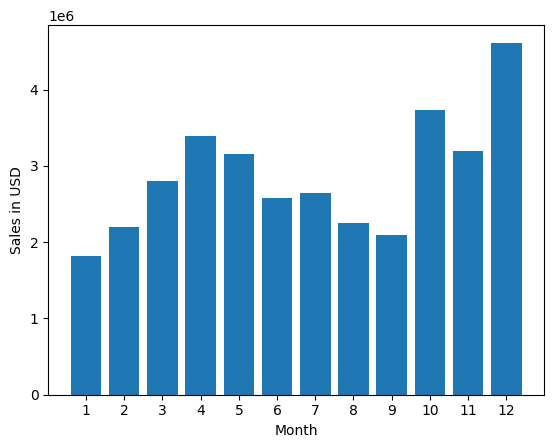

In [87]:
month = range(1,13)
plt.bar(x=month , height = Sales_value)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Sales in USD')


###Task 3.2: What citi has the best sale?


In [90]:
address_city = lambda address: address.split(',')[1]

In [91]:
df['City'] = df['Purchase Address'].apply(address_city )
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,"387 10th St, Austin, TX 73301",01,Austin


In [105]:
Best_city_value = df.groupby('City').sum()['Sales']
Best_city_value.max()

8262204.0

In [103]:
cities  = df['City'].unique()
print(cities)

[' Boston' ' Portland' ' San Francisco' ' Los Angeles' ' Austin'
 ' Atlanta' ' Seattle' ' New York City' ' Dallas']


TypeError: bar() missing 1 required positional argument: 'height'

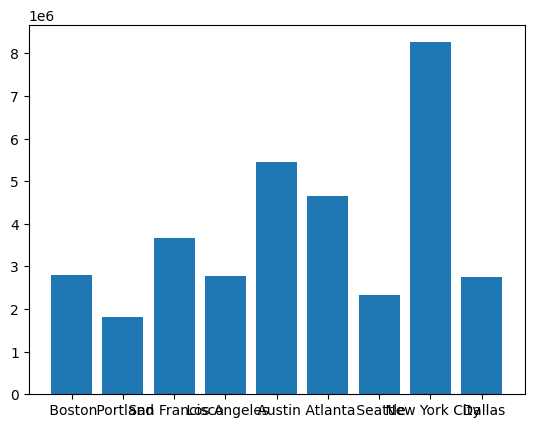

In [106]:

plt.bar(x= cities , height = Best_city_value )
plt.bar(cities)
plt.xticks()
plt.xlabel('Cities')
plt.ylabel('Sales in USD')